SENTIMENT ANALYSIS

OBJECTIVE

Main objective of this project is to make a ML model which will be able to understand user's emotions by using user's voice as well as facial emotions.


<br><br>

## INTRODUCTION

Text classification is one of the fundamental task in Natural Language Processing. The goal is to assign labels to text. It has broad applications including topic labeling, sentiment classification (Maas et al., 2011; Pang and Lee, 2008), and spam detection. Traditional approaches of text classification represent documents with sparse lexical features, such as n-grams, and then use a linear model or kernel methods on this representation. More recent approaches used deep learning, such as convolutional neural networks (Blunsom et al., 2014) and recurrent neural networks based on long short-term memory (LSTM) (Hochreiter and Schmidhuber, 1997) to learn text representations.<br><br>  
Sentiment analysis is one of it's applications, which can be defined as:  
The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

To classify text we need to classify emotions. 
There are six basic emotions possessed by humans : ANGER , DISGUST, FEAR, HAPPINESS, SADNESS & SURPRISE. 
The additional emotions possessed are further sub-set or they are a combination of these six basic emotions: 

# Emotion
Emotion is any relatively brief conscious experience characterized by intense mental activity and a high degree of pleasure or displeasure. Scientific discourse has drifted to other meanings and there is no consensus on a definition. Emotion is often intertwined with mood, temperament, personality, disposition, and motivation. In some theories, cognition is an important aspect of emotion. Those acting primarily on the emotions they are feeling may seem as if they are not thinking, but mental processes are still essential, particularly in the interpretation of events. For example, the realization of our believing that we are in a dangerous situation and the subsequent arousal of our body's nervous system (rapid heartbeat and breathing, sweating, muscle tension) is integral to the experience of our feeling afraid. Other theories, however, claim that emotion is separate from and can precede cognition.

<br>
# Mathematical Models 
Standard approaches to NLP, some years ago involved extracting a set of features from some labeled piece of text, the features were usually N-grams. Once the N-grams were extracted the next step was to train a linear model on some pre-labeled data so that similar text could be classified.  <br><br>

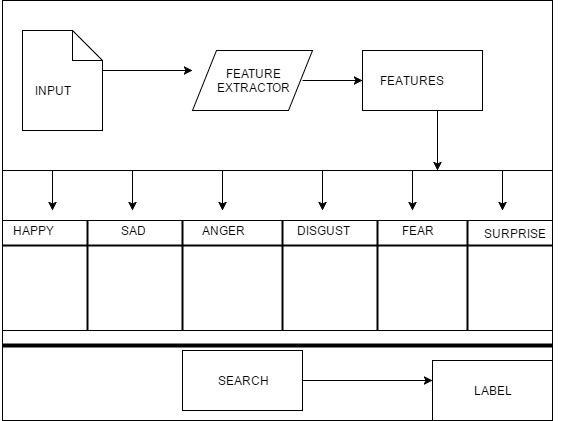

In [5]:
from IPython.display import Image
Image(filename='MODEL1.jpg')

MODEL 1 above is a non Machine Learning model which uses the basic idea to search specific emotional words(features) in the list of the six lists above. When the word is found in any of the list, it assigns the label to it.

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

texted = input("Enter the test sentence ")

stop_words = set(stopwords.words('english'))
token = word_tokenize(texted)

filtered_sentence = [w for w in token if not w in stop_words]

filtered_sentence = []

for w in token:
    if w not in stop_words:
        filtered_sentence.append(w)

# the initials lists
happy = []
sad = []
anger = []
disgust = []
fear = []
surprise = []

# flags
happy_flag = 0
sad_flag = 0
anger_flag = 0
disgust_flag = 0
fear_flag = 0
surprise_flag = 0

# searching elements of filtered_sentence in lists and increasing respective flag

for key in filtered_sentence:
    if key in happy is True:
        happy_flag = happy_flag + 1
    elif key in sad is True:
        sad_flag = sad_flag + 1
    elif key in happy is True:
        anger_flag = anger_flag + 1
    elif key in happy is True:
        disgust_flag = disgust_flag + 1
    elif key in happy is True:
        fear_flag = fear_flag + 1
    elif key in happy is True:
        surprise_flag = surprise_flag + 1
    else:
        pass


def TypeOfSentence(happy_flag, sad_flag, anger_flag, disgust_flag, fear_flag, surprise_flag):
    return max(happy_flag, sad_flag, anger_flag, disgust_flag, fear_flag, surprise_flag)


print(TypeOfSentence())


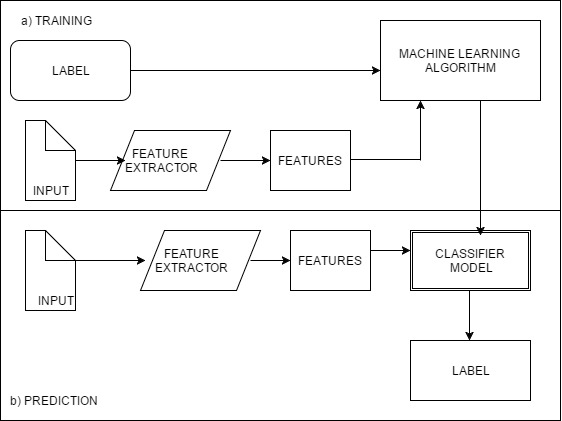

In [6]:
from IPython.display import Image
Image(filename='MODEL2.jpg')

MODEL 2 shown above is a simple classification model, which is trained to label words, and based on that it further predicts 
the label of given test sentence.


In [ ]:
from sklearn import tree    # Labeling data using Decision Tree

train_x = []                # setting up the train sets
train_y = []

# If having a small set to train directly enter to the list
# If importing data from a specific file
'''with open('') as file:       # file name in ''
    l = file.readline()         # assuming the first word or letter is the label
    l.split()
    for line in file:
        temp = line.split()
        n = len(temp)
        train_x.append(int(temp[0]))
        train_y.append(" ".join(temp[1:n]))'''



clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)         # training the model, for x vs y


y_test = input("Enter the test sentence : \t")
output=clf.predict(y_test)

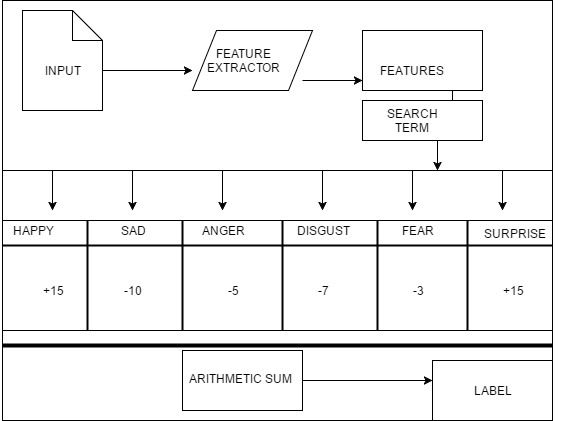

In [7]:
from IPython.display import Image
Image(filename='MODEL3.jpg')

MODEL3 above uses arithmetic sum to label the data. Each emotion is given a specific arithmetic value. When any feature is found in any list, the sum is incremented for that list. This process is done till the completion of a given sentence or paragraph. In the end the total sum is taken from all the lists and the final value assingns the label to the test input. 

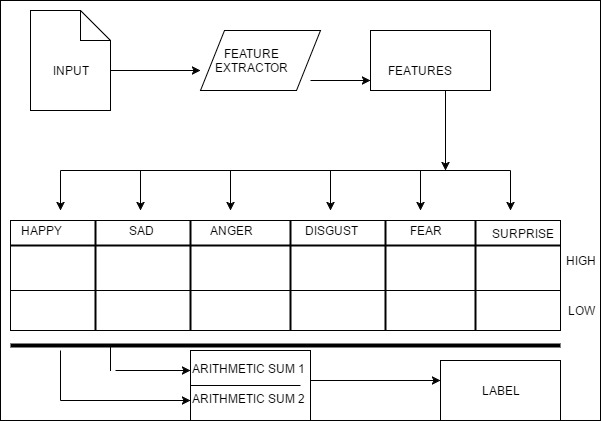

In [8]:
from IPython.display import Image
Image(filename='MODEL4.jpg')

MODEL 4 separates the features into futher two categories: High level features and Low level features. Which are assigned different weightages. Once the features are found and categoried, the weighted mean is taken and label is assigned to the test input. 

Applications :
The model can be used in the feild of psychology, which can be used to treat patients.
Can be used in the as interactive chatbots on website's.
Virtual assistant

The process of feature extraction became highly popular by open sourcing "Google's word2vec". It's a toolkit which helps to code words into vectors, these vectors are representation of word called Word Embeddings that are trained on a given corpus. 

The kit consists of two models named Skip-Ngram and Continuous Bag of Words(CBW).These models helps to encode words. Once vectors are obtained we can use them for Sentiment Analysis. 

# Hierarchical Attention Networks for Document Classification 

 Zichao Yang constructed a new neural architecture to model a document. It starts by encoding words and applying an attention mechanism to extract the most important words. Then, it encodes the sentence by using the weights it learned and applies an attention mechanism to it again to extract the most important sentence, which consequently builds a document level vector. 
So, it creates vectors for each layer of abstraction within a document and builds them one over the other. The encoder for each of these levels is called a Gated Recurrent Unit (GRU) neural network. 
So, after we initialize the model using vectors from word2vec, it is trained on this new neural network, which outperforms every other model mentioned above.

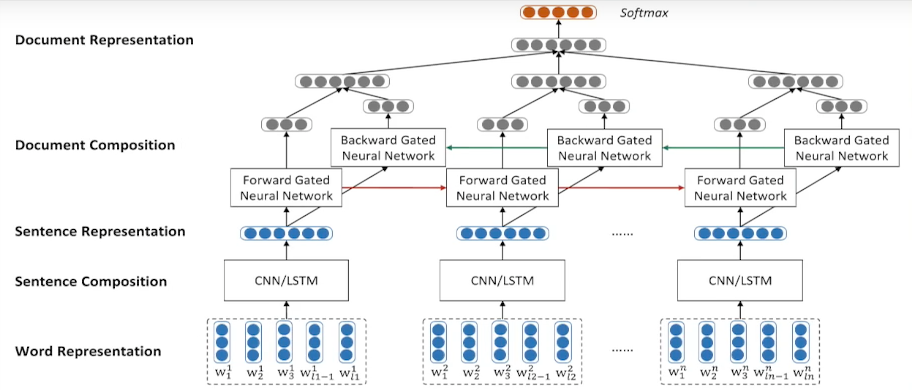

In [9]:
from IPython.display import Image
Image(filename='NEW.PNG')

Applications :
The model can be used in the feild of psychology, which can be used to treat patients.
Can be used in the as interactive chatbots on website's.
Virtual assistant

# Conclusion
The <b>Hierarchical Attention Networks for Document Classification</b> is able to get better results as compared to the other models which makes it easy for the computer to analyse Sentiments.
If machines are able to analyse sentiments, it can be further used into many aspects and human needs.
like personal psychologist,better personal assistantts and chatbots, etc.